# Wholesale Customer

## 1. Business understanding

This business works on customer purchase behavior, so the **objective** of this project is to determine which group a client belongs to based on its purchases. Due to the target is unknown, this is an **unsupervised learning clustering problem**.

## 2. Data Understanding

The data comes from the UC Irvine Machine Learning Repository and it is structured.

* **Features**:
  * Channel (Categorical)
  * Region (Categorical)
  * Fresh (Numeric)
  * Milk (Numeric)
  * Grocery (Numeric)
  * Frozen (Numeric)
  * Detergents_Paper (Numeric)
  * Delicassen (Numeric)

Link: <https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set>

## 3. Data exploration

### 3.1. Review the state of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use("ggplot")

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "wholesale_customers")

In [4]:
df_train = pd.read_csv(os.path.join(PATH_DATA, "Wholesale customers data.csv"))
print("Shape:", df_train.shape)
df_train.head()

Shape: (440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### 3.1.1. Categorical

In [7]:
categorical_features = ["Channel", "Region"]

In [8]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_train[c].unique())


Feature: Channel
[2 1]

Feature: Region
[3 1 2]


#### 3.1.2. Numeric

In [9]:
numeric_features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df_train[numeric_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### 3.1.3. Conclusion

* There are 440 rows.
* There are no missing values.
* The data is composed of a combination of categorical and numeric features.
* The numeric features are in different scales.
* The categorical features have an ordinal meaning. However, it is not clear if this values come from a ranking, so for the purpose of this project they are going to be treated as non-ordinal.
* With respect to data cleaning, this step is not necessary to carry out EDA process, because the data is clean enough.

### 3.2. Exploratory Data Analysis (EDA)

#### 3.2.1. Categorical

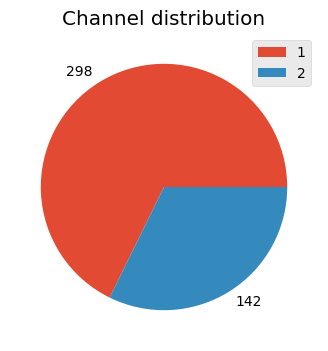

In [10]:
counts = df_train["Channel"].value_counts()

fig = plt.figure(figsize = (4, 4))
plt.pie(counts, labels = counts)
plt.legend(counts.keys().tolist())
plt.title("Channel distribution")
plt.show()

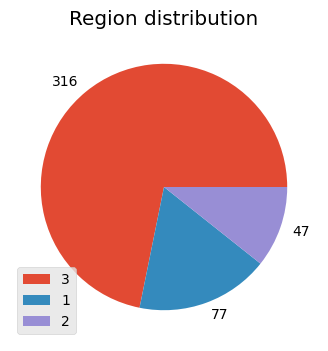

In [11]:
counts = df_train["Region"].value_counts()

fig = plt.figure(figsize = (4, 4))
plt.pie(counts, labels = counts)
plt.legend(counts.keys().tolist())
plt.title("Region distribution")
plt.show()

#### 3.2.2. Numeric

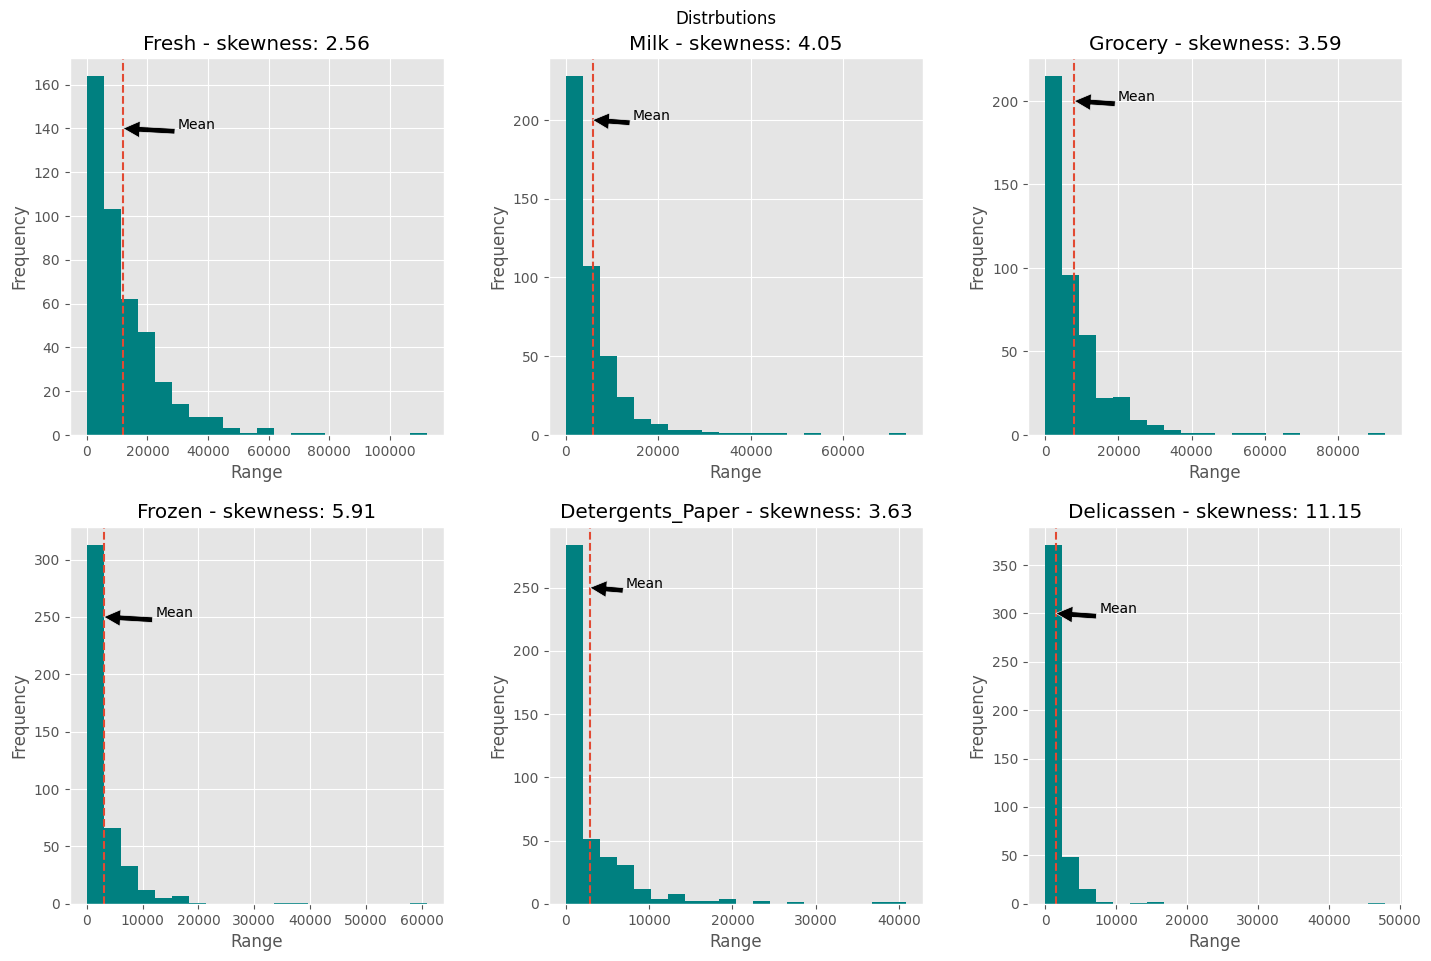

In [12]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (15, 10))
fig.tight_layout(pad = 4.5)
fig.suptitle("Distrbutions")

ax1.hist(df_train["Fresh"], bins = 20, color = "teal")
ax1.set_title("Fresh - skewness: " + str(round(df_train["Fresh"].skew(), 2)))
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Range")
ax1.axvline(x = df_train["Fresh"].mean(), linestyle = "dashed")
ax1.annotate("Mean", xy = (df_train["Fresh"].mean(), 140), xytext=(df_train["Fresh"].mean()*2.5, 140), arrowprops = dict(facecolor = "black"))

ax2.hist(df_train["Milk"], bins = 20, color = "teal")
ax2.set_title("Milk - skewness: " + str(round(df_train["Milk"].skew(), 2)))
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Range")
ax2.axvline(x = df_train["Milk"].mean(), linestyle = "dashed")
ax2.annotate("Mean", xy = (df_train["Milk"].mean(), 200), xytext=(df_train["Milk"].mean()*2.5, 200), arrowprops = dict(facecolor = "black"))

ax3.hist(df_train["Grocery"], bins = 20, color = "teal")
ax3.set_title("Grocery - skewness: " + str(round(df_train["Grocery"].skew(), 2)))
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Range")
ax3.axvline(x = df_train["Grocery"].mean(), linestyle = "dashed")
ax3.annotate("Mean", xy = (df_train["Grocery"].mean(), 200), xytext=(df_train["Grocery"].mean()*2.5, 200), arrowprops = dict(facecolor = "black"))

ax4.hist(df_train["Frozen"], bins = 20, color = "teal")
ax4.set_title("Frozen - skewness: " + str(round(df_train["Frozen"].skew(), 2)))
ax4.set_ylabel("Frequency")
ax4.set_xlabel("Range")
ax4.axvline(x = df_train["Frozen"].mean(), linestyle = "dashed")
ax4.annotate("Mean", xy = (df_train["Frozen"].mean(), 250), xytext=(df_train["Frozen"].mean()*4, 250), arrowprops = dict(facecolor = "black"))

ax5.hist(df_train["Detergents_Paper"], bins = 20, color = "teal")
ax5.set_title("Detergents_Paper - skewness: " + str(round(df_train["Detergents_Paper"].skew(), 2)))
ax5.set_ylabel("Frequency")
ax5.set_xlabel("Range")
ax5.axvline(x = df_train["Detergents_Paper"].mean(), linestyle = "dashed")
ax5.annotate("Mean", xy = (df_train["Detergents_Paper"].mean(), 250), xytext=(df_train["Detergents_Paper"].mean()*2.5, 250), arrowprops = dict(facecolor = "black"))

ax6.hist(df_train["Delicassen"], bins = 20, color = "teal")
ax6.set_title("Delicassen - skewness: " + str(round(df_train["Delicassen"].skew(), 2)))
ax6.set_ylabel("Frequency")
ax6.set_xlabel("Range")
ax6.axvline(x = df_train["Delicassen"].mean(), linestyle = "dashed")
ax6.annotate("Mean", xy = (df_train["Delicassen"].mean(), 300), xytext=(df_train["Delicassen"].mean()*5, 300), arrowprops = dict(facecolor = "black"))

plt.show()

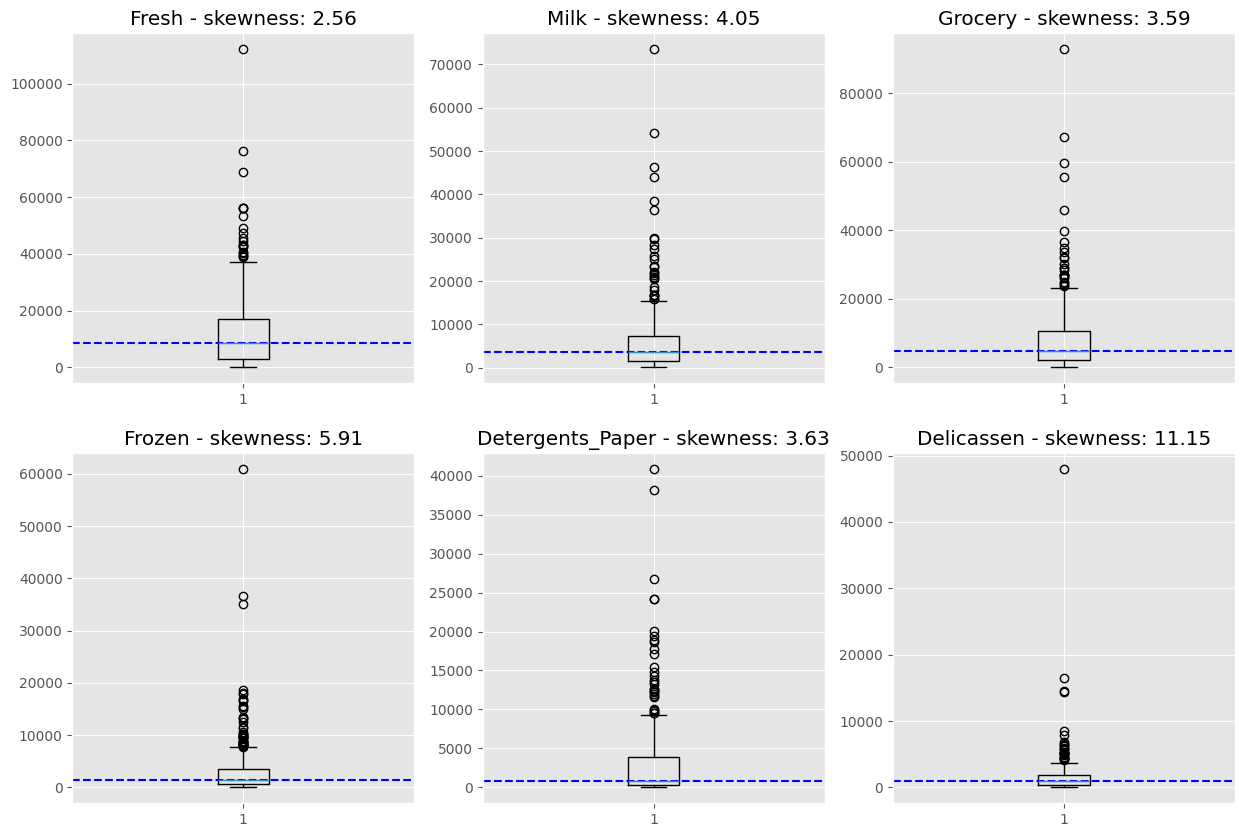

In [13]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (15, 10))
ax1.boxplot(df_train["Fresh"])
ax1.set_title("Fresh - skewness: " + str(round(df_train["Fresh"].skew(), 2)))
ax1.axhline(df_train["Fresh"].median(), linestyle = "dashed", color = "blue")

ax2.boxplot(df_train["Milk"])
ax2.set_title("Milk - skewness: " + str(round(df_train["Milk"].skew(), 2)))
ax2.axhline(df_train["Milk"].median(), linestyle = "dashed", color = "blue")

ax3.boxplot(df_train["Grocery"])
ax3.set_title("Grocery - skewness: " + str(round(df_train["Grocery"].skew(), 2)))
ax3.axhline(df_train["Grocery"].median(), linestyle = "dashed", color = "blue")

ax4.boxplot(df_train["Frozen"])
ax4.set_title("Frozen - skewness: " + str(round(df_train["Frozen"].skew(), 2)))
ax4.axhline(df_train["Frozen"].median(), linestyle = "dashed", color = "blue")

ax5.boxplot(df_train["Detergents_Paper"])
ax5.set_title("Detergents_Paper - skewness: " + str(round(df_train["Detergents_Paper"].skew(), 2)))
ax5.axhline(df_train["Detergents_Paper"].median(), linestyle = "dashed", color = "blue")

ax6.boxplot(df_train["Delicassen"])
ax6.set_title("Delicassen - skewness: " + str(round(df_train["Delicassen"].skew(), 2)))
ax6.axhline(df_train["Delicassen"].median(), linestyle = "dashed", color = "blue")

plt.show()

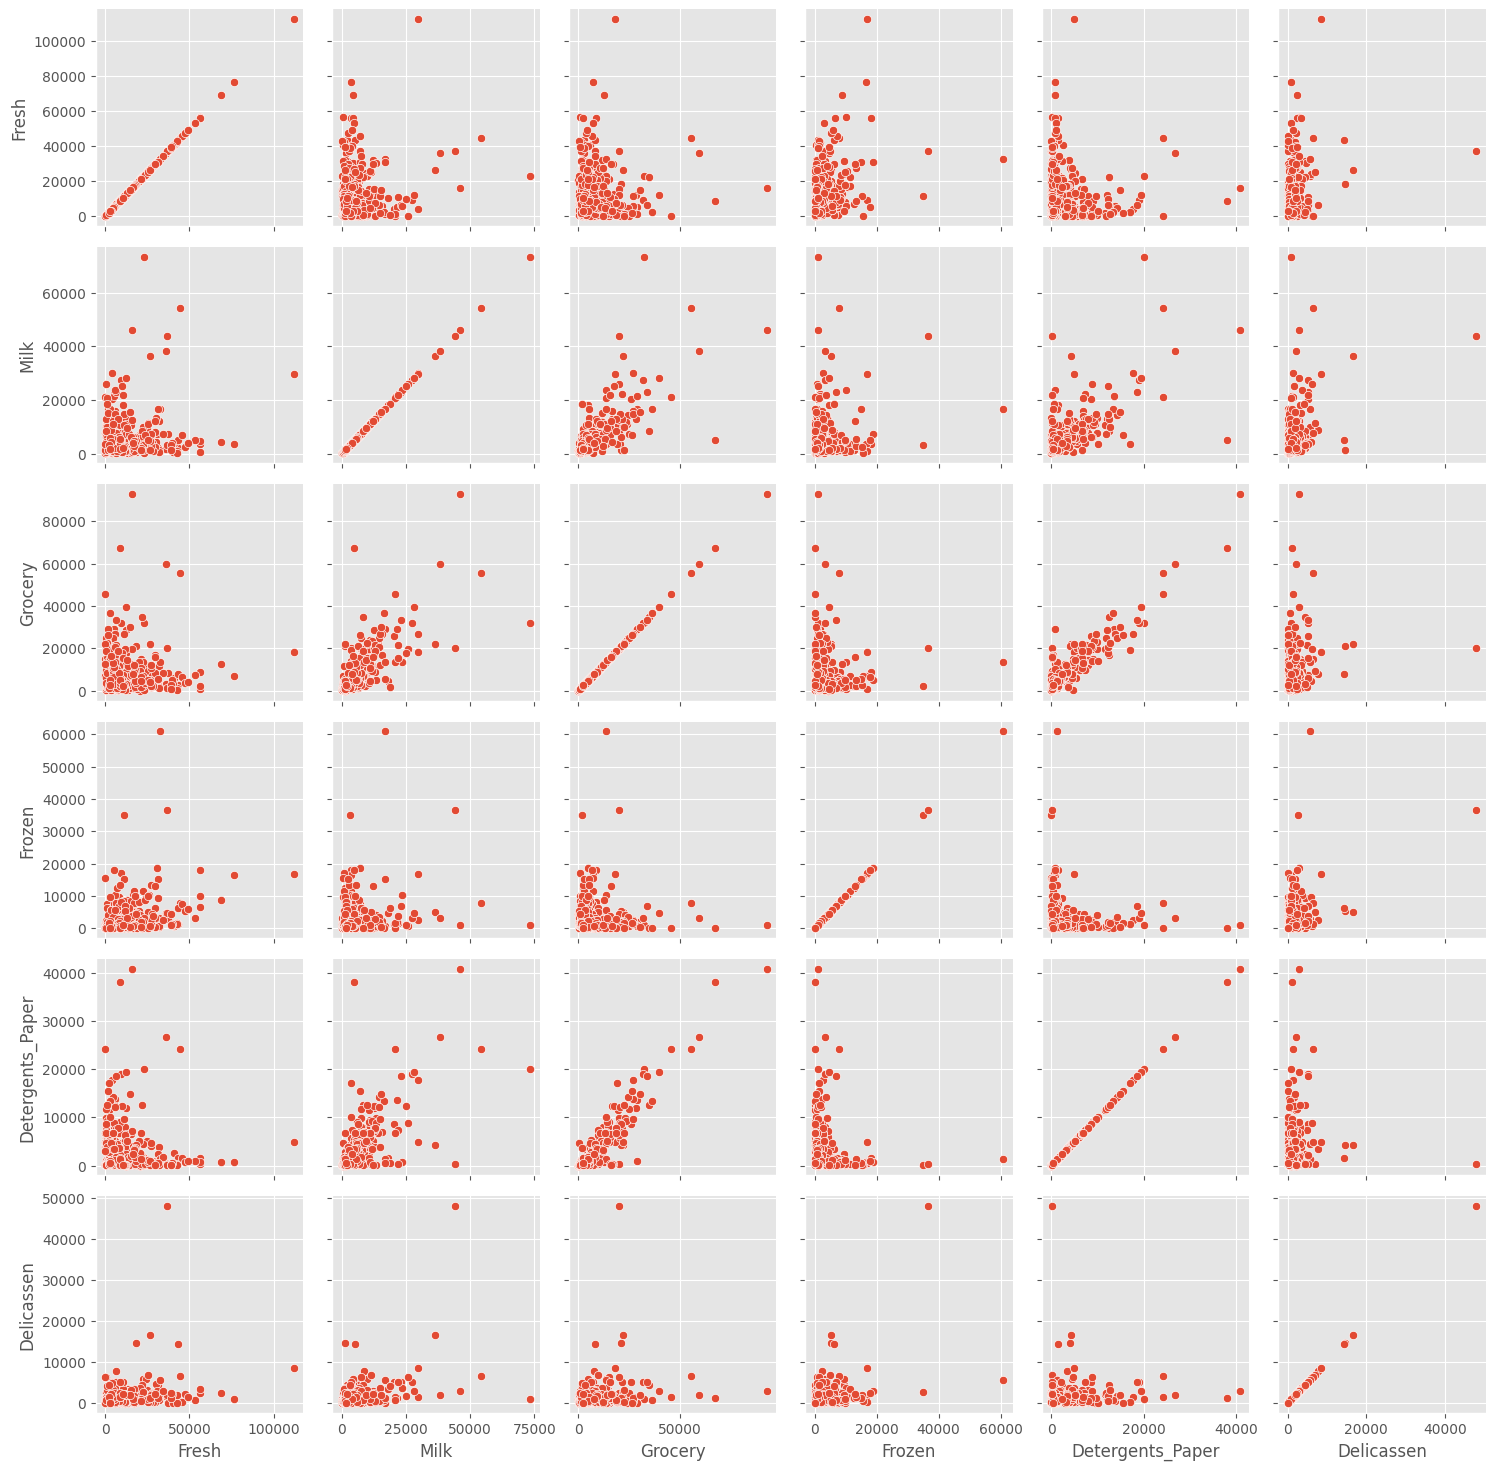

In [14]:
g = sns.PairGrid(df_train[numeric_features])
g.map(sns.scatterplot)

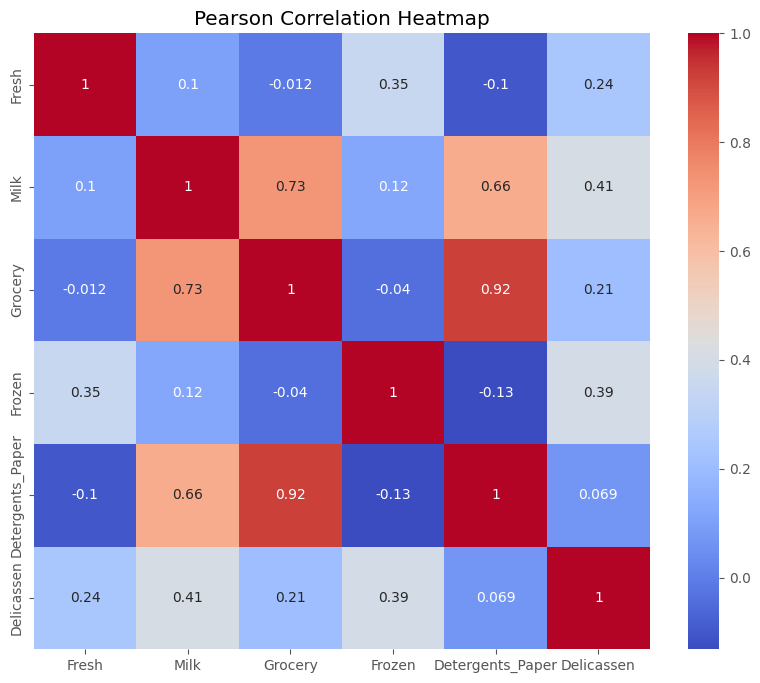

In [15]:
correlation_matrix = df_train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Numeric features distribution'}, ylabel='Density'>

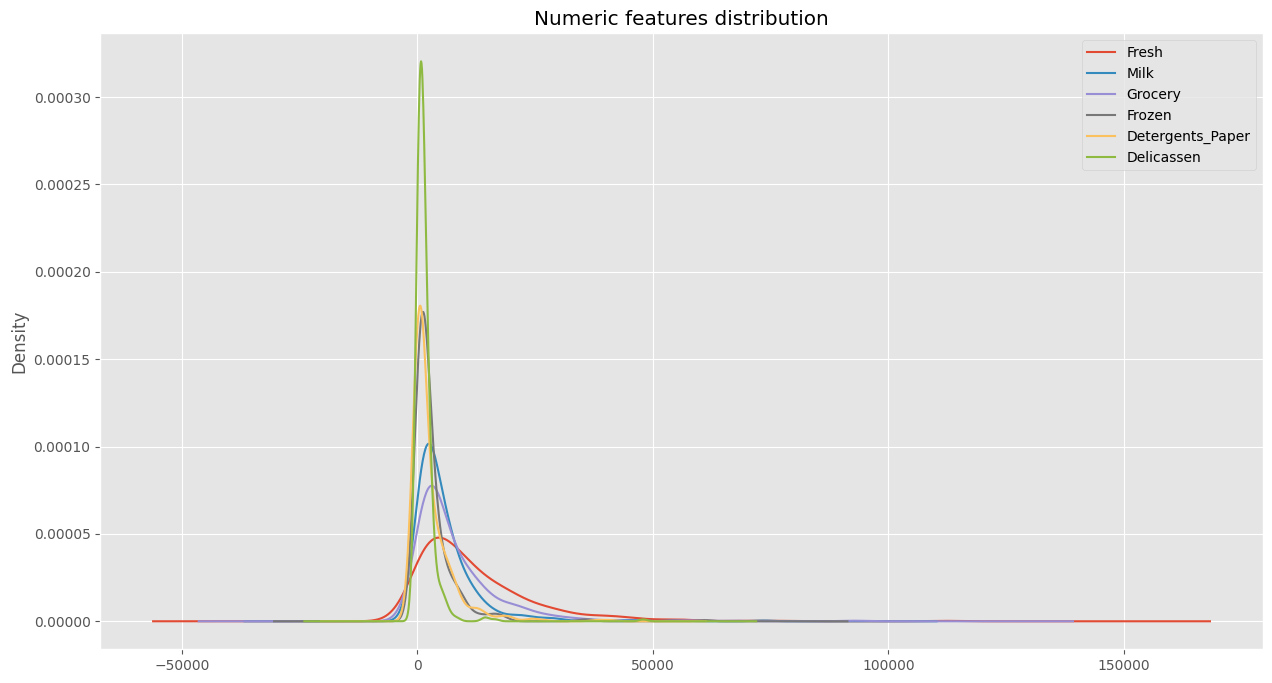

In [16]:
df_train[numeric_features].plot(kind = "kde", figsize = (15, 8), title = "Numeric features distribution")

#### 3.2.3. Conclusion

* For categorical features, all classes are not equally distributed.
* For numeric features, there two pair of features with strong correlation:
  * Grocery - Detergents_paper.
  * Grocery - Milk.
* For numeric features, all features have outliers and the data is extremely skewed.

#### 3.2.4. Save file

In [17]:
path_csv_clean = "wholesale_customers_cleaned.csv"
df_train.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)